# Pymaceuticals


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


In [2]:
# Reading mouse data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
#reading clinical data
clinical_data = pd.read_csv(clinical_trial_data_to_load)
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#merging datas and read
mouse_clinical_data = pd.merge(mouse_data,clinical_data, how = "left", on = "Mouse ID")
mouse_clinical_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tum_vols_mean = mouse_clinical_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
tum_vols_mean = pd.DataFrame(tum_vols_mean)
tum_vols_mean = tum_vols_mean.reset_index()
tum_vols_mean.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


## Tumor Response to Treatment

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tum_vols_sem = mouse_clinical_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
tum_vols_sem = pd.DataFrame(tum_vols_sem)
tum_vols_sem = tum_vols_sem.reset_index()
tum_vols_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
organized_means = tum_vols_mean.pivot(index = "Timepoint", columns= "Drug", values = "Tumor Volume (mm3)")
organized_means.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [8]:
# Minor Data Munging to Re-Format the Data Frames
organized_sem = tum_vols_sem.pivot(index = "Timepoint", columns = "Drug", values =  "Tumor Volume (mm3)")
organized_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


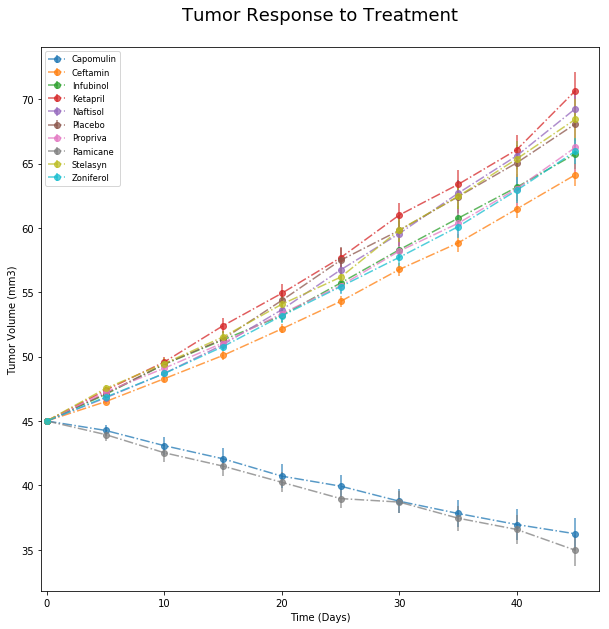

In [9]:
drugs = []
for x in tum_vols_mean["Drug"].unique():
    drugs.append(x)


#Making line errorbar graph for each drug with different colors
fig, ax = plt.subplots(figsize=(10,10))

c = -1
for drug in drugs:
    c+=1
    drug = ax.errorbar(tum_vols_mean["Timepoint"].unique(),organized_means[drug], yerr= organized_sem[drug],
            fmt="o", color=f"C{c}", alpha=0.75, label = drug,linestyle = "-.")
    
        
ax.set_xlim(-0.5, 47);
ax.set_xlabel("Time (Days)");
ax.set_ylabel("Tumor Volume (mm3)");
ax.set_title("Tumor Response to Treatment\n",fontsize = 18);
plt.legend(loc="best", fontsize="small", fancybox=True);


plt.savefig("Tum_Response.png")

In [10]:
met_vols_mean = mouse_clinical_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
met_vols_mean = pd.DataFrame(met_vols_mean)
met_vols_mean = met_vols_mean.reset_index()
met_vols_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
organized_met_mean = met_vols_mean.pivot(index = "Timepoint", columns= "Drug", values = "Metastatic Sites",)
organized_met_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


## Metastatic Response to Treatment

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_vols_sem = mouse_clinical_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
met_vols_sem = pd.DataFrame(met_vols_sem)
met_vols_sem = met_vols_sem.reset_index()
met_vols_sem.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
organized_met_sem = met_vols_sem.pivot(index = "Timepoint", columns= "Drug", values = "Metastatic Sites",)
organized_met_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


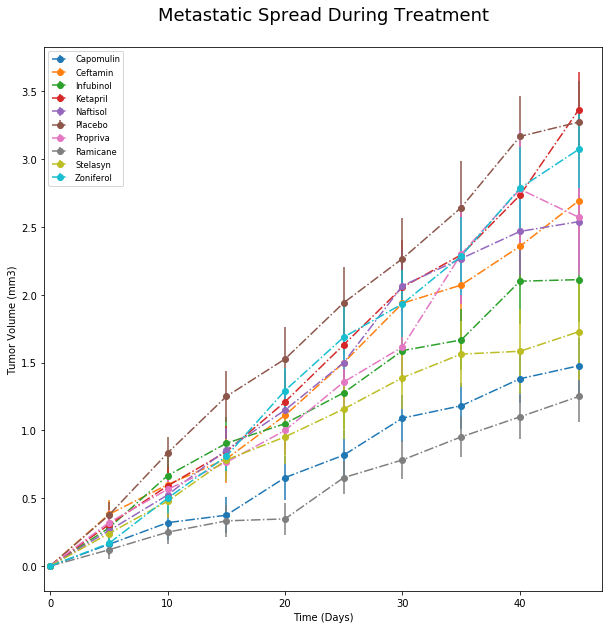

In [14]:
#Making line errorbar graph for each drug with different colors
fig, ax = plt.subplots(figsize=(10,10))

c = -1
for drug in drugs:
    c+=1
    drug = ax.errorbar(tum_vols_mean["Timepoint"].unique(),organized_met_mean[drug], yerr= organized_met_sem[drug],
            fmt="o", color=f"C{c}", alpha=1, label = drug,linestyle = "-.")
    
        
ax.set_xlim(-0.5, 47);
ax.set_xlabel("Time (Days)");
ax.set_ylabel("Tumor Volume (mm3)");

plt.legend(loc="best", fontsize="small", fancybox=True);
plt.title("Metastatic Spread During Treatment\n", fontsize = 18);


plt.savefig("Mean_Tum_Vol.png")

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = mouse_clinical_data.groupby(["Drug","Timepoint"]).count()["Mouse ID"].rename("Mouse Count")
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df = mouse_count_df.reset_index()
mouse_count_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
organized_mouse_count = mouse_count_df.pivot(index = "Timepoint", columns= "Drug", values = "Mouse Count")
organized_mouse_count.head(15)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


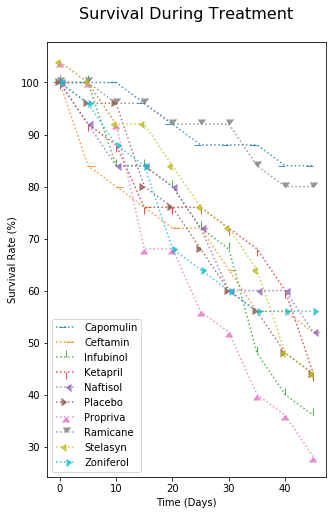

In [17]:
# Generate the Plot (Accounting for percentages)

mouse_count_df["Percent Survive"] = mouse_count_df["Mouse Count"]/25*100

fig, ax = plt.subplots(figsize = (5,8))

ax.set_title("Survival During Treatment\n", fontsize = 16);


c = 0
for drug in drugs:
    
    drug = ax.plot(tum_vols_mean["Timepoint"].unique(),organized_mouse_count[drug]/25*100, marker = c, 
                    ms = 7, alpha = 0.80, linestyle= "dotted" );
    c+=1
ax.set_xlabel("Time (Days)");
ax.set_ylabel("Survival Rate (%)");
ax.legend(loc= "best");

plt.savefig("Survival.png")

In [18]:
organized_means.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
changes = []
change_dic = {}
ch = 0
for drug in drugs:
    ch = (organized_means[drug][45]-organized_means[drug][0])/organized_means[drug][0]*100
    changes.append(ch)
    change_dic[drug] = ch
#create a dataframe for drug changes
changes_df = pd.DataFrame(columns = ["Drug","Percent Change"])
changes_df["Drug"] = drugs
changes_df["Percent Change"] = changes

changes_df


,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


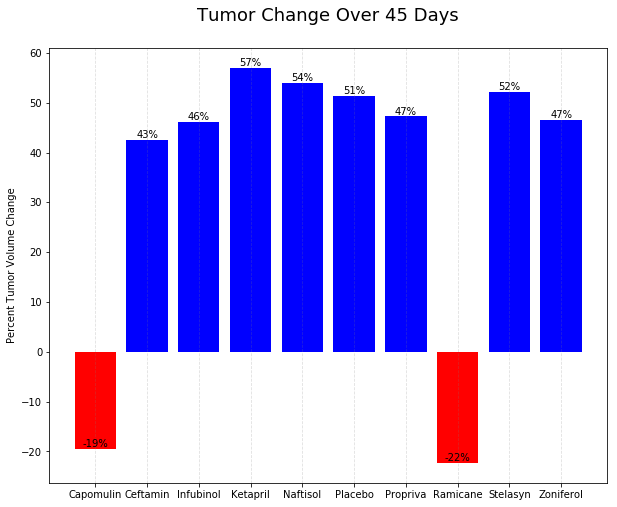

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
for drug,percent in change_dic.items():
    if percent > 0:
        ax.bar(drug, percent,color = "b", align="center")
    else:
        ax.bar(drug,percent,color = "r", align="center")
plt.savefig("percent_change.png")
ax.xaxis.grid(True, linestyle='--', which="Major",
                   color='grey', alpha=.25)
rects = ax.patches

# Make some labels.
labels = [format(percent/100,"0.0%") for x,percent in change_dic.items()]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom')
plt.savefig("Percent_Change_Bar.png")

ax.set_ylabel("Percent Tumor Volume Change");
ax.set_title("Tumor Change Over 45 Days\n", fontsize = 18);